<a href="https://colab.research.google.com/github/W0jtEk99/X/blob/main/Predykcja_liczby_medali_dru%C5%BCyn_sportowych_z_wykorzystaniem_Regresji_Liniowej_i_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

## --- Wczytanie danych ---

In [45]:
from google.colab import files
uploaded = files.upload()

Saving teams.csv to teams (1).csv


In [46]:
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


# --- Wybranie tylko potrzebnych kolumn ---

In [47]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]


In [48]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0



# --- Analiza korelacji ---
# Sprawdzenie współzależności liczbowych kolumn z medalami

In [49]:
teams.corr(numeric_only=True)["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


In [50]:
import seaborn as sns

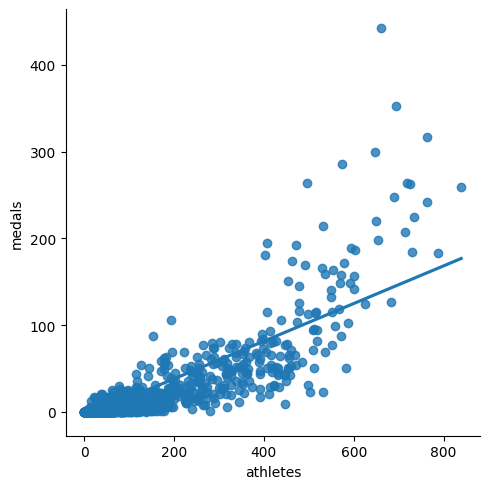

In [51]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None)

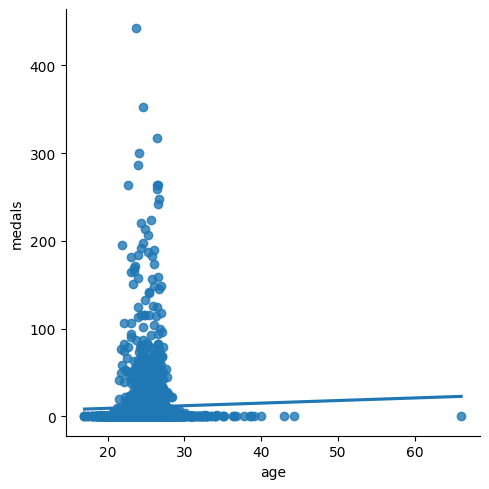

In [52]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

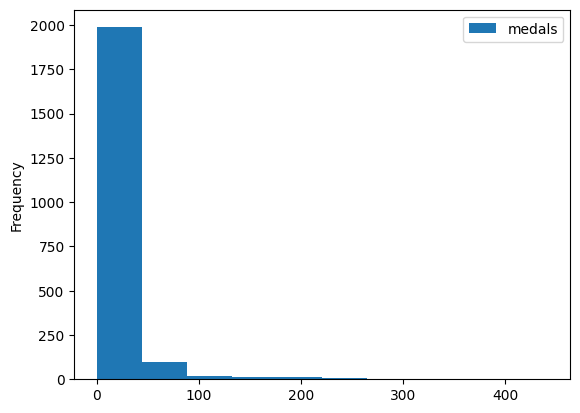

In [53]:
teams.plot.hist(y="medals")

# --- Czyszczenie danych ---


In [54]:
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [55]:
teams = teams.dropna()

In [56]:
teams.shape

(2014, 7)


# --- Podział na zbiór treningowy i testowy ---

In [57]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

# --- Sprawdzenie liczby rekordów ---

In [58]:
# About 80% of the data
train.shape

(1609, 7)

In [59]:
# About 20% of the data
test.shape

(405, 7)

#--- Model 1: Regresja liniowa ---

In [60]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [61]:
predictors = ["athletes", "prev_medals"]

In [62]:
reg.fit(train[predictors], train["medals"])
LinearRegression()

LinearRegression()

In [63]:
predictions = reg.predict(test[predictors])

In [64]:
predictions.shape

(405,)

In [65]:
test["predictions"] = predictions

In [66]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [67]:
test["predictions"] = test["predictions"].round()

In [68]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [69]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [70]:
teams.describe()["medals"]

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


In [71]:
test["predictions"] = test["predictions"].round()

In [72]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [73]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [74]:
errors = (test["medals"] - test['predictions']).abs()

In [75]:
errors


,0
6,1.0
7,0.0
24,0.0
25,0.0
37,1.0
...,...
2111,0.0
2131,0.0
2132,0.0
2142,2.0


In [76]:
error_by_team = errors.groupby(test["team"]).mean()

In [77]:
error_by_team

,0
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


In [78]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [79]:
error_ratio =  error_by_team / medals_by_team

In [80]:
error_ratio

,0
team,
AFG,1.0
ALB,NaN
ALG,1.0
AND,NaN
ANG,NaN
...,...
VIE,1.0
VIN,NaN
YEM,NaN


In [85]:
import numpy as np
error_ratio = error_ratio[~pd.isnull(error_ratio)]

In [82]:
error_ratio

,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
USA,0.126953
UZB,0.625000
VEN,1.750000


<Axes: ylabel='Frequency'>

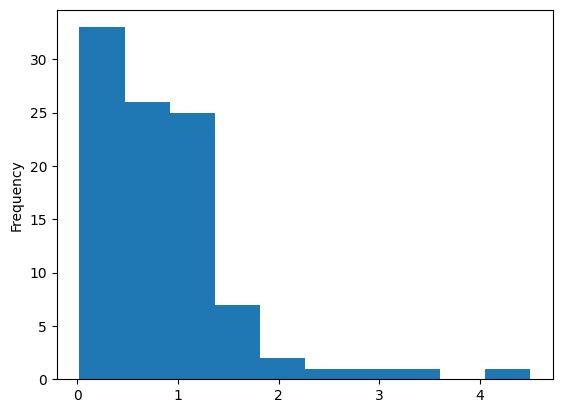

In [88]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()

In [86]:
error_ratio.sort_values()

,0
team,
FRA,0.022472
CAN,0.048387
NZL,0.063492
RUS,0.082353
ITA,0.121429
...,...
CMR,inf
CHI,inf
ECU,inf


# --- Model 2: Random Forest ---

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
predictors = ["athletes", "prev_medals"]

reg.fit(train[predictors], train["medals"])
predictions = reg.predict(test[predictors])
predictions = np.round(np.clip(predictions, 0, None))
test["predictions_lr"] = predictions

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train[predictors], train["medals"])

rf_predictions = rf.predict(test[predictors])
rf_predictions = np.round(np.clip(rf_predictions, 0, None))

test["predictions_rf"] = rf_predictions

# --- Porównanie modeli ---

In [91]:
from sklearn.metrics import mean_absolute_error

mae_lr = mean_absolute_error(test["medals"], test["predictions_lr"])
mae_rf = mean_absolute_error(test["medals"], test["predictions_rf"])

print("MAE - Regresja Liniowa:", mae_lr)
print("MAE - Random Forest:", mae_rf)

MAE - Regresja Liniowa: 3.2987654320987656
MAE - Random Forest: 3.8518518518518516


# --- Wykres porównawczy: rzeczywiste vs przewidywane ---

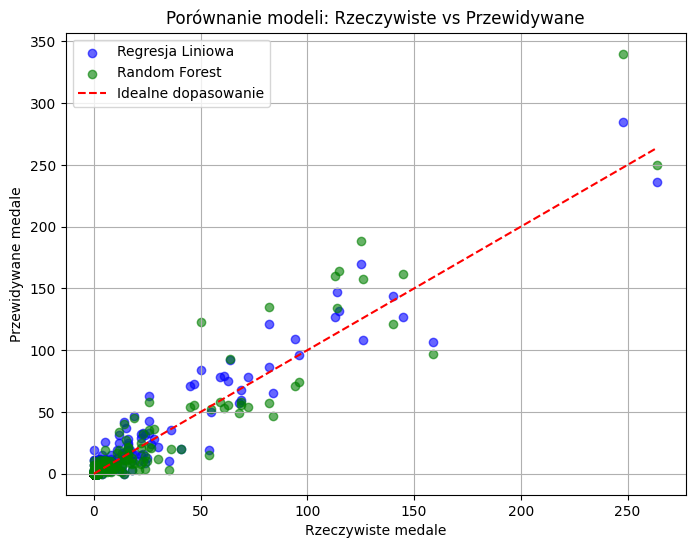

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(test["medals"], test["predictions_lr"], alpha=0.6, label="Regresja Liniowa", color="blue")
plt.scatter(test["medals"], test["predictions_rf"], alpha=0.6, label="Random Forest", color="green")
plt.plot([0, test["medals"].max()], [0, test["medals"].max()], 'r--', label="Idealne dopasowanie")
plt.xlabel("Rzeczywiste medale")
plt.ylabel("Przewidywane medale")
plt.title("Porównanie modeli: Rzeczywiste vs Przewidywane")
plt.legend()
plt.grid(True)
plt.show()

# --- Ranking krajów ---

In [93]:
print("Top 10 krajów (Regresja Liniowa):")
print(test.groupby("team")["predictions_lr"].sum().sort_values(ascending=False).head(10))

print("\nTop 10 krajów (Random Forest):")
print(test.groupby("team")["predictions_rf"].sum().sort_values(ascending=False).head(10))

Top 10 krajów (Regresja Liniowa):
team
USA    521.0
CHN    297.0
RUS    276.0
AUS    268.0
GBR    235.0
GER    216.0
FRA    182.0
BRA    162.0
JPN    157.0
ESP    146.0
Name: predictions_lr, dtype: float64

Top 10 krajów (Random Forest):
team
USA    590.0
CHN    348.0
GBR    320.0
RUS    285.0
AUS    269.0
BRA    181.0
GER    168.0
JPN    140.0
FRA    131.0
NED    112.0
Name: predictions_rf, dtype: float64


# --- Korelacje między wszystkimi cechami --

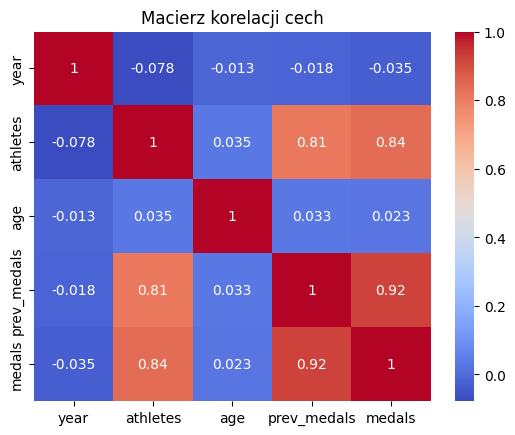

In [94]:
corr = teams.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Macierz korelacji cech")
plt.show()


# --- Obliczanie względnych błędów ---

In [98]:
errors_lr = (test["medals"] - test["predictions_lr"]).abs()
errors_rf = (test["medals"] - test["predictions_rf"]).abs()

In [99]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [100]:
error_rel_lr = errors_lr.groupby(test["team"]).mean() / medals_by_team
error_rel_rf = errors_rf.groupby(test["team"]).mean() / medals_by_team

In [101]:
error_rel_lr = error_rel_lr[np.isfinite(error_rel_lr)]
error_rel_rf = error_rel_rf[np.isfinite(error_rel_rf)]


# --- Histogram błędów względnych ---

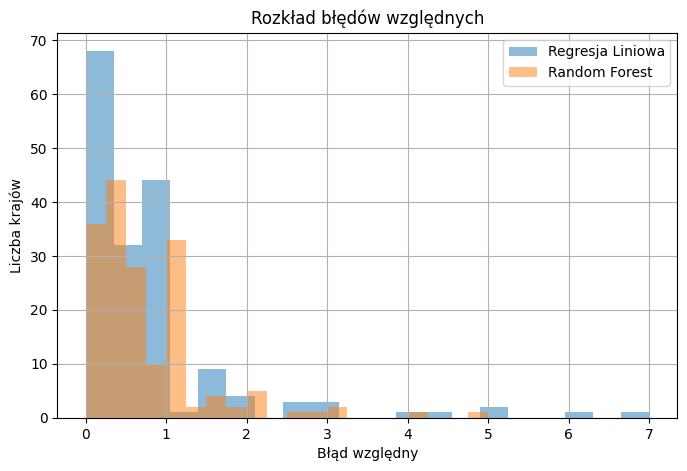

In [97]:
plt.figure(figsize=(8,5))
plt.hist(error_rel_lr[np.isfinite(error_rel_lr)], bins=20, alpha=0.5, label="Regresja Liniowa")
plt.hist(error_rel_rf[np.isfinite(error_rel_rf)], bins=20, alpha=0.5, label="Random Forest")
plt.xlabel("Błąd względny")
plt.ylabel("Liczba krajów")
plt.legend()
plt.title("Rozkład błędów względnych")
plt.grid(True)
plt.show()